## Predicting the chances of buying a car through influence from Social Media Ads

#### Let us use some personal factors to predict how people respond to buying cars based on Social Media Ads.

In [75]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [76]:
#import dataset 

ads_data = pd.read_csv('ads_data_car_prediction.csv')
ads_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Inspecting Dataframe

In [77]:
# Let's check the dimensions of the dataframe

ads_data.shape

(400, 5)

In [78]:
# let's look at the statistical aspects of the dataframe

ads_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [79]:
# Let's see the type of each column

ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Data Cleaning

In [80]:
#checking categories in Gender

ads_data.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [81]:
#checking categories in Gender

ads_data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [82]:
#checking null values in columns

ads_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [83]:
ads_data.drop(['User ID'],inplace=True,axis=1)
ads_data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### We do not need to perform any data cleaning or conversion as all the columns and rows are perfect

## Checking for outliers

In [84]:
ads_data[['Age','EstimatedSalary']].describe(percentiles=[0.25,.5,.75,.9,.95,.99])

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
90%,52.100000,122000.000000
95%,57.050000,137050.000000
99%,60.000000,148010.000000


#### We can see the values are gradually moving around and there are no real outliers in the data

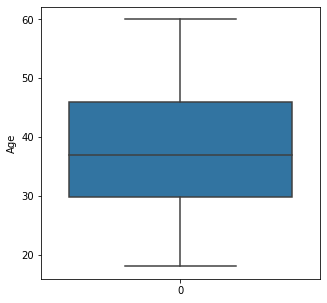

In [85]:
#plotting Age for outlier detection

plt.figure(figsize=[5,5])

sns.boxplot(data=ads_data.Age)
plt.ylabel('Age')
plt.show()

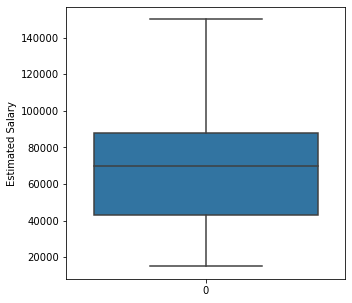

In [86]:
#plotting Age for outlier detection

plt.figure(figsize=[5,5])

sns.boxplot(data=ads_data.EstimatedSalary)
plt.ylabel('Estimated Salary')
plt.show()

#### As we can see from the graphs, there are no real outliers present

## Data Visualization

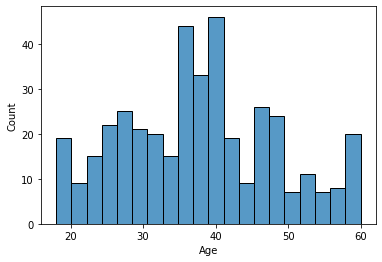

In [87]:
#plotting the frequency of each age groups

sns.histplot(data=ads_data.Age,bins=20)
plt.show()

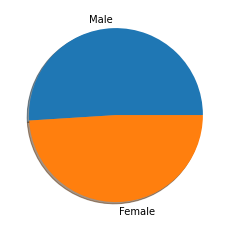

In [88]:
#checking imbalance in Gender

z = ads_data.Gender.value_counts(normalize=True)[0]
y= ads_data.Gender.value_counts(normalize=True)[1]
plt.pie(x = [z,y],labels=['Male','Female'],shadow=True)
plt.show()

#### Data doesn't show any imbalance between Male and Female counts

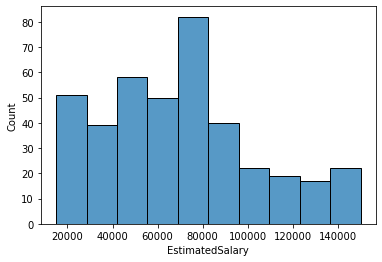

In [89]:
#plotting the frequency of diff salaries

sns.histplot(data=ads_data.EstimatedSalary,bins=10)
plt.show()

<AxesSubplot:xlabel='Purchased', ylabel='Count'>

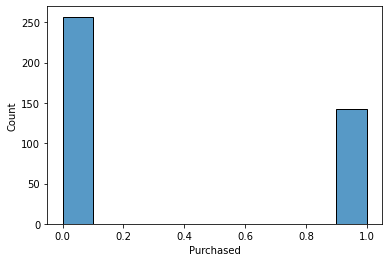

In [90]:
sns.histplot(data=ads_data.Purchased)

## Dummy Variables 

#### We have Gender columns having labels 'Male' and 'Female', we can input only numerical values to model. So we create dummies

In [91]:
gender = pd.get_dummies(ads_data.Gender,drop_first=True)
gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


#### Now, we will append this dataframe to original and drop the actual 'Gender' column

In [92]:
ads_data.drop('Gender',axis=1,inplace=True)
car_purchase = pd.concat([ads_data,gender], axis=1)
car_purchase.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


## Checking Multicollinearity

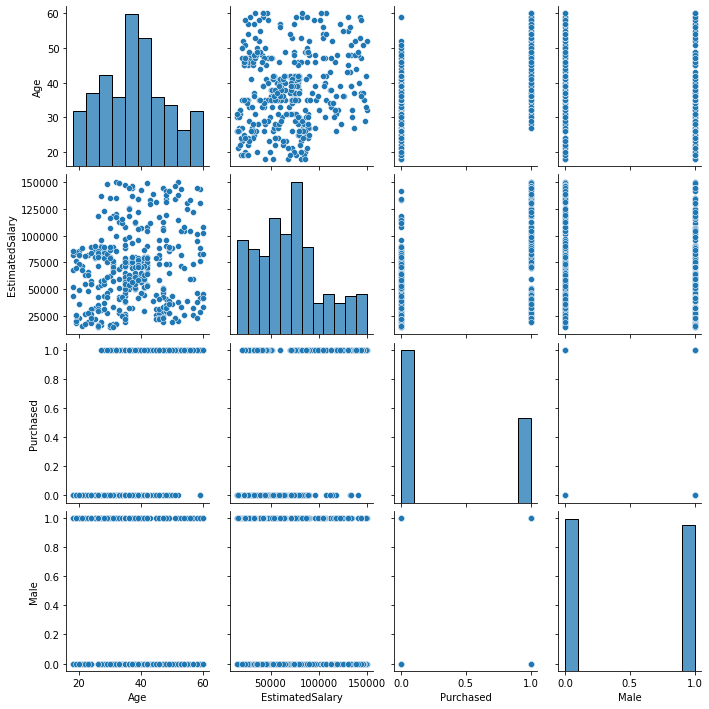

In [93]:
#pairplot to see the linear nature among variables

sns.pairplot(car_purchase)
plt.show()

#### We can see that there is not much multicollinearity among variables. However, we can see that Age and Estimated Salary are in a strong Linear Relationship

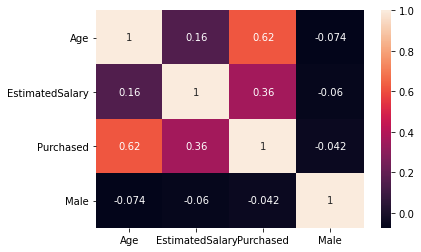

In [95]:
sns.heatmap(car_purchase.corr(),annot=True)
plt.show()

## Test-Train Split

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
y = car_purchase.pop('Purchased')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [98]:
X = car_purchase
X.head()

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [99]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state=100)

## Feature Scaling

In [100]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train[['Age','EstimatedSalary']] = scaler.fit_transform(X_train[['Age','EstimatedSalary']])

X_train.head()

In [104]:
# Checking the purchase Rate
purchased = (sum(y)/len(y.index))*100
purchased

35.75

#### We only have approx 36% of successful purchases

## Model Building

In [105]:
import statsmodels.api as sm

In [107]:
logm1 = sm.GLM(y_train,sm.add_constant(X_train), family=sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  280
Model:                            GLM   Df Residuals:                      276
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.922
Date:                Sat, 21 Aug 2021   Deviance:                       193.84
Time:                        13:49:08   Pearson chi2:                     280.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5057      0.297     -5.071      0.000      -2.088      -0.924
Age                 2.3791      0.316      7.527      0.000       1.760       2.999
EstimatedSalary     1.2325      0.220      5.591      0.000       0.800       1.665
Male                0.5599      0.367      1.525      0.127      -0.160       1.280
===================================================================================
"""

## Checking VIFs

In [108]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Age,1.04
1,EstimatedSalary,1.04
2,Male,1.00


#### Column Male has a high p-value, hence we will drop it

In [110]:
#dropping column Male

X_train_sm1 = X_train.drop('Male',axis=1)
X_train_sm1.head()

,Age,EstimatedSalary
234,0.046836,1.149422
45,-1.389011,-1.434496
171,-0.336056,1.233680
47,-1.006118,-0.479570
265,0.429728,1.037078
...,...,...
343,0.908344,-0.563828
359,0.429728,-0.479570
323,1.004067,-1.153635
280,2.057021,0.475357


In [111]:
#using statsmodel to add a constant

X_train_sm1 = sm.add_constant(X_train_sm1)
X_train_sm1.head()

,const,Age,EstimatedSalary
234,1.0,0.046836,1.149422
45,1.0,-1.389011,-1.434496
171,1.0,-0.336056,1.233680
47,1.0,-1.006118,-0.479570
265,1.0,0.429728,1.037078


In [114]:
logm2 = sm.GLM(y_train,X_train_sm1, family=sm.families.Binomial())

res1 = logm2.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  280
Model:                            GLM   Df Residuals:                      277
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -98.110
Date:                Sat, 21 Aug 2021   Deviance:                       196.22
Time:                        23:48:55   Pearson chi2:                     278.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.1958      0.204     -5.860      0.000      -1.596      -0.796
Age                 2.3143      0.308      7.515      0.000       1.711       2.918
EstimatedSalary     1.2046      0.218      5.535      0.000       0.778       1.631
===================================================================================
"""

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Age,1.04
2,EstimatedSalary,1.04
0,const,1.00


#### Now, we have the VIF as well as the p-values under the saturation range. So, we can proceed with this model

## Predictions

In [117]:
#Making predictions on the train set

y_train_pred = res1.predict(X_train_sm1)
y_train_pred.head()

234    0.573752
45     0.002154
171    0.380496
47     0.016272
265    0.740383
dtype: float64

#### Let us now compare the original purchase values with the predicted ones

#### We will create a dataframe consisting of Original 'Purchased' column values ,predicted probabilities & it's conversions

In [118]:
y_train_pred_final = pd.DataFrame({'Purchased':y_train.values, 'Predicted Prob':y_train_pred})
y_train_pred_final.head()

,Purchased,Predicted Prob
234,0,0.573752
45,0,0.002154
171,0,0.380496
47,0,0.016272
265,1,0.740383


#### We will now convert the prob values into 1s and 0s based on a random cutoff value of 0.5

In [119]:
y_train_pred_final['predicted_purchase'] = y_train_pred_final['Predicted Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Purchased,Predicted Prob,predicted_purchase
234,0,0.573752,1
45,0,0.002154,0
171,0,0.380496,0
47,0,0.016272,0
265,1,0.740383,1


## Evaluation

In [120]:
from sklearn import metrics

In [122]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Purchased, y_train_pred_final.predicted_purchase)

print(confusion)

[[167  15]
 [ 29  69]]


In [123]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Purchased, y_train_pred_final.predicted_purchase))

0.8428571428571429
